C:\Users\allen\Miniconda3\envs\qtdev\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


<IPython.core.display.Javascript object>


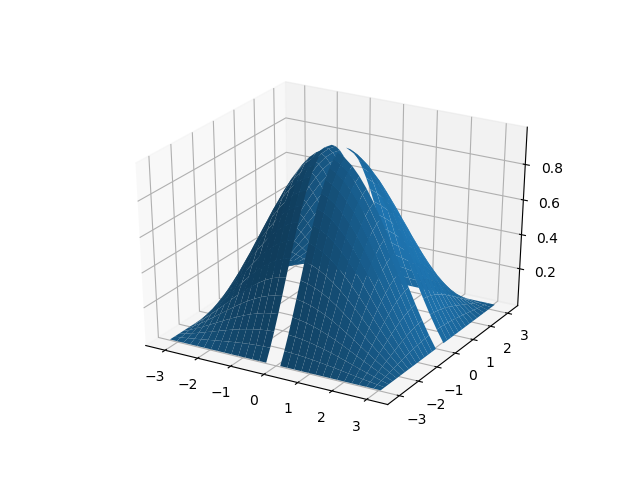

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

f = lambda x, y: np.sin(x)*np.sin(y)/(x*y)

xs, ys = np.mgrid[-np.pi:np.pi:31j, -np.pi:np.pi:31j]
zs = f(xs, ys)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X=xs, Y=ys, Z=zs)

<IPython.core.display.Javascript object>


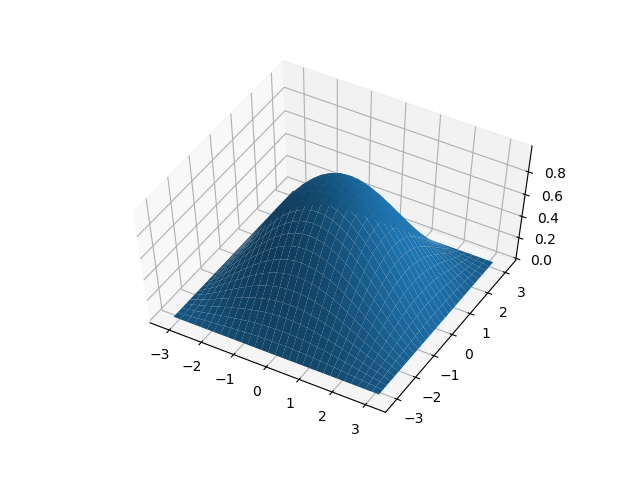

In [50]:
from scipy import interpolate

# integer arrays for indexing
x_indx, y_indx = np.meshgrid(np.arange(0, zs.shape[1]),
                             np.arange(0, zs.shape[0]))

# mask all invalid values
zs_masked = np.ma.masked_invalid(zs)

# retrieve the valid, non-Nan, defined values
valid_xs = x_indx[~zs_masked.mask]
valid_ys = y_indx[~zs_masked.mask]
valid_zs = zs_masked[~zs_masked.mask]

# generate interpolated array of z-values
zs_interp = interpolate.griddata((valid_xs, valid_ys), valid_zs.ravel(),
                                 (x_indx, y_indx), method='cubic')

# finally, plot the data 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X=xs, Y=ys, Z=zs_interp)

In [52]:
from scipy import interpolate
help(interpolate.griddata)

Help on function griddata in module scipy.interpolate.ndgriddata:

griddata(points, values, xi, method='linear', fill_value=nan, rescale=False)
    Interpolate unstructured D-dimensional data.
    
    Parameters
    ----------
    points : ndarray of floats, shape (n, D)
        Data point coordinates. Can either be an array of
        shape (n, D), or a tuple of `ndim` arrays.
    values : ndarray of float or complex, shape (n,)
        Data values.
    xi : 2-D ndarray of float or tuple of 1-D array, shape (M, D)
        Points at which to interpolate data.
    method : {'linear', 'nearest', 'cubic'}, optional
        Method of interpolation. One of
    
        ``nearest``
          return the value at the data point closest to
          the point of interpolation.  See `NearestNDInterpolator` for
          more details.
    
        ``linear``
          tessellate the input point set to n-dimensional
          simplices, and interpolate linearly on each simplex.  See
          `Li